# IDS Assignment 2
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. 

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file in moodle.

# Preprocessing and Data Quality 


### Question 1 (Order cancellations)

Invoices with a InvoiceNo starting with the letter ‘c’ are order cancellations. Would you recommend keeping the order cancellation in your data set? Also provide a reason for your recommandation. 

Your answer:

It does not make sense to keep the order cancellations because they might be incomplete and therefore would distort the wanted real result.

In [163]:
#Modify the data set according to your recommendation
import pandas as pd

data = pd.read_excel("Assignment2Datasets\Assignment2Datasets\Online Retail.xlsx")

In [164]:
print("Shape with Cancellations",data.shape[0])

data["InvoiceNo"] = data["InvoiceNo"].astype('str')
mask = data["InvoiceNo"].str.contains(case=False,pat='c', regex=False)
modified_data = data[~mask]

print("Shape without Cancellations",modified_data.shape[0])

Shape with Cancellations 541909
Shape without Cancellations 532621


### Question 2 (Empty values)

The attributes Description and CustomerID contain empty values. The Country attribute contains an “unspecified” value. For each of the three attributes reason how you would handle these values and why. 

In [165]:
print("Empty descriptions:",pd.isnull(modified_data["Description"]).sum())
print("Empty CustomerIDs:",pd.isnull(modified_data["CustomerID"]).sum())
print("Unspecified Countries:",modified_data[modified_data["Country"] == "Unspecified"].shape[0])

Empty descriptions: 1454
Empty CustomerIDs: 134697
Unspecified Countries: 446


Your answer:

Description:
It is fine to keep the description empty, because the StockCode identifies the product and not the description. Also there is only a small amount of products with an empty description.

CustomerID: 
It is fine to keep the CustomerID empty, because we are not interested in who made the order, but in the overall buying behaviour. Also there are 134697 empty CustomerIDs and if we would remove the elements where the CustomerIDs are empty, we would lose a considerable amount of data and might get different results.

Country:
Because we need to know the Country attribute in the following exercise 'association rules', it is better to remove these items. Also it does not make a huge difference when removing these items, because there are only 446 items with unspecified countries.


In [166]:
#Modify the data set according to your recommendation

modified_data = modified_data[modified_data["Country"] != 'Unspecified']
modified_data.shape[0]

532175

### Question 3 (Outliers/Noise)
Explore into the attributes Quantity and UnitPrice by plotting each attribute visually. Do these attributes contain noise and/or outliers? If so, reason how you would handle them and modify your data set accordingly.


In [167]:
#Your code

import matplotlib.pyplot as plt

modified_data2 = modified_data[modified_data["Quantity"] > 0]

boxplot = plt.boxplot(modified_data2["Quantity"],labels=['Quantity'], showmeans=True, meanline=True)
whiskers = [item.get_ydata()[1] for item in boxplot['whiskers']]

print(whiskers)

# remove all outliers

cleanedData = modified_data2[(modified_data2["Quantity"] >= whiskers[0]) 
                           & (modified_data2["Quantity"] <= whiskers[1])]

[1.0, 23.0]


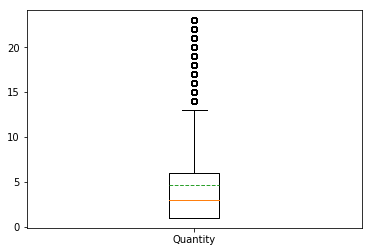

In [168]:
boxplot2 = plt.boxplot(cleanedData["Quantity"],labels=['Quantity'], showmeans=True, meanline=True)

[0.001, 8.33]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


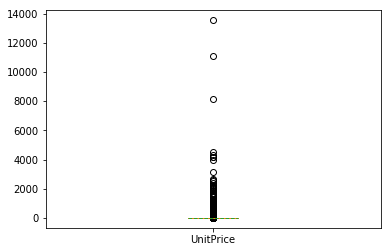

In [169]:
modified_data3 = modified_data[modified_data["UnitPrice"] > 0]

boxplot3 = plt.boxplot(modified_data3['UnitPrice'],labels=['UnitPrice'], showmeans=True, meanline=True)
whiskers2 = [item.get_ydata()[1] for item in boxplot3['whiskers']]

print(whiskers2)

# remove all outliers

cleanedData2 = modified_data3[(modified_data3["UnitPrice"] >= whiskers2[0]) 
                           & (modified_data2["UnitPrice"] <= whiskers2[1])]

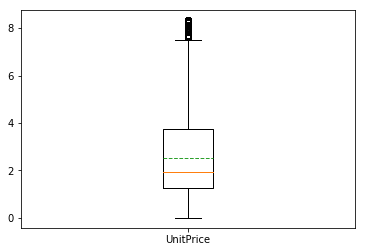

In [170]:
boxplot4 = plt.boxplot(cleanedData2["UnitPrice"],labels=['UnitPrice'], showmeans=True, meanline=True)

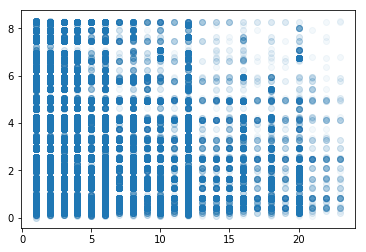

In [171]:
final_data = modified_data[modified_data['Quantity'] > 0]
final_data = final_data[(final_data['Quantity'] >= whiskers[0]) & (final_data['Quantity'] <= whiskers[1])]

final_data = final_data[final_data['UnitPrice'] > 0]
final_data = final_data[(final_data['UnitPrice'] >= whiskers2[0]) & (final_data['UnitPrice'] <= whiskers2[1])]

plt.scatter(final_data['Quantity'], final_data['UnitPrice'],alpha=0.05)

In [172]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

unit_price_reshaped = np.array(final_data['UnitPrice']).reshape(-1,1)

discretizer = preprocessing.KBinsDiscretizer(n_bins=21, encode='ordinal', strategy = 'uniform')
discretizer.fit(unit_price_reshaped)

discretized_unit_price = discretizer.transform(unit_price_reshaped).reshape(1,-1)

#displaying the edges of each bin per attribute
print(discretizer.bin_edges_)

# showing the transformed data
# use bin numbers to create better rounded numbers
new_unit_price = (discretized_unit_price+1)*0.4 - 0.2

new_unit_price = new_unit_price.reshape(-1)

final_data2 = final_data
final_data2['UnitPrice'] = pd.Series(new_unit_price)

final_data2.head()

[array([1.00000000e-03, 3.97619048e-01, 7.94238095e-01, 1.19085714e+00,
       1.58747619e+00, 1.98409524e+00, 2.38071429e+00, 2.77733333e+00,
       3.17395238e+00, 3.57057143e+00, 3.96719048e+00, 4.36380952e+00,
       4.76042857e+00, 5.15704762e+00, 5.55366667e+00, 5.95028571e+00,
       6.34690476e+00, 6.74352381e+00, 7.14014286e+00, 7.53676190e+00,
       7.93338095e+00, 8.33000000e+00])]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.6,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom


In [173]:
final_data2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.6,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.4,17850.0,United Kingdom


Your explanation:

remove outliers after removing invalid values < 0
use binning for noise in unitprice

# Visualization

### Question 4 (Stream graph)
Create a stream graph that visualizes the number  of purchases (invoices) per country over time.

4. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland.

In [174]:
#your modification

country_data = final_data2[(final_data2['Country'] == 'Belgium')
                          | (final_data2['Country'] == 'EIRE')
                          | (final_data2['Country'] == 'France')
                          | (final_data2['Country'] == 'Germany')
                          | (final_data2['Country'] == 'Netherlands')
                          | (final_data2['Country'] == 'Norway')
                          | (final_data2['Country'] == 'Portugal')
                          | (final_data2['Country'] == 'Spain')
                          | (final_data2['Country'] == 'Switzerland')]

4. (b) Modify the data set such that it shows per month for each country how many purchases were made (i.e. how many invoices were created).

In [0]:
#your modification



4. (c) Use the modified data to create a stream graph. 

In [0]:
#your code

4. (d) Use this graph to compare the purchases made by each country. 

Your answer:

### Question 5 (Heat map)
Create a heat map that visualizes how much (in sterling) each country purchases per month. 

5. (a) Modify the data set to only contain purchases made in the countries Belgium, Ireland (EIRE), France, Germany, the Netherlands, Norway, Portugal, Spain and Switzerland. (Or use the version of the data set that you created for question 4 a).

In [0]:
#your modification

5. (b) Modify the data set such that it shows per month how much money (in sterling) was spent in the shop per country.

In [0]:
#your modification

5. (c) Use the modified data to create a heat map. 

In [0]:
#your code

5. (d) Compare the amount of the purchases over time and between each country. 

Your answer:

### Question 6 (Interpretation)
Compare the results obtained from the stream graph and the heat map. Is there a relation between the number of purchases and the amount purchased in sterling?


Your answer:

# Clustering
Presume that the business analyst would like to cluster transactions with similar types of products into the same group (here don’t consider the quantity of the products). For each product, only use its ‘StockCode’ to represent it. All the results here should be based on the preprocessed data set obtained from question 1 to 3 of this assignment. Presume that this obtained data set from question 1 to 3 has a variable name ‘cluster_dataset’ and is expressed by Pandas DataFrame in your code.

### Question 7 (Data transformation and clustering)
7. (a) Calculate and show the number of occurrences of each product in data set   ‘cluster_dataset’. For example, if a product appears in a transaction, then its occurrence number will be increased by 1 (do not consider the quantity of this product here). Preserve the 100 most frequent products and remove all the other products in ‘cluster_dataset’. For example, if a row in ‘cluster_dataset’ contains unqualified product, then remove this row from ‘cluster_dataset’. Show the new ‘cluster_dataset’ in your result.


In [224]:
# your code

cluster_dataset = final_data

cluster_dataset_counts = cluster_dataset['StockCode'].astype(str).value_counts()
print(cluster_dataset_counts)

85123A    1878
85099B    1818
20725     1455
47566     1296
20727     1266
22383     1263
22457     1208
23203     1145
22382     1137
22720     1125
22386     1122
20728     1119
22411     1117
21931     1114
84879     1090
22469     1076
22384     1070
22666     1063
23209     1051
22960     1043
82482     1038
22727     1026
22961     1020
23206     1012
20726     1004
22197     1004
22086     1003
23298      993
22993      985
22699      968
          ... 
22846        1
90078        1
90214U       1
37330        1
90026C       1
90024D       1
84620        1
84550        1
84691        1
22704        1
84795C       1
85230E       1
90195B       1
90183c       1
84743C       1
22168        1
47591b       1
21655        1
85049c       1
84387A       1
90048        1
90063B       1
84227        1
44228        1
16202B       1
84856S       1
35597B       1
90025B       1
23232        1
21491        1
Name: StockCode, Length: 3656, dtype: int64


In [226]:
top100 = cluster_dataset_counts[:100]

cluster_dataset = cluster_dataset[cluster_dataset['StockCode'].astype(str).isin(top100.index)]
cluster_dataset = cluster_dataset.drop_duplicates(subset = ['InvoiceNo','StockCode'])
cluster_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.6,17850.0,United Kingdom
17,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,8.2,13047.0,United Kingdom
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,5.0,13047.0,United Kingdom
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.8,12583.0,France
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.6,17850.0,United Kingdom


7. (b) Based on question a, please reorganize the data from ‘cluster_dataset’ and generate a new data set ‘cluster_dataset_new’ which has a suitable format (for k-means) for solving the transaction clustering problem mentioned above. Show the data from ‘cluster_dataset_new’ by using Pandas DataFrame in your result, where the index should be consistent with the values of 'InvoiceNo', the column name should be consistent with the values of 'StockCode' and each element in this DataFrame should have a value 0 or 1.

In [277]:
# your code

cluster_dataset_new = pd.crosstab(cluster_dataset.InvoiceNo, cluster_dataset.StockCode)
cluster_dataset_new

StockCode,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536378,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
536381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


7. (c) Try values 2, 3, 4, 5 for parameter 'n_clusters' for the k-means function from Scikit-Learn over the data set ‘cluster_dataset_new’ generated in question b. Show the ‘within cluster variation’ (also called ‘sum of squared distances’) of the generated clusters for each different setting for ‘n_clusters’ in your result. Also write down the value that you have tried for setting 'n_clusters' which can help generate the best clustering results and explain how you make this decision.

In [258]:
# your code

from sklearn.cluster import KMeans

for n_clusters in range(2,6):
    kmeans = KMeans(n_clusters).fit(cluster_dataset_new)
    cluster_variation = kmeans.inertia_
    print('n_clusters=',n_clusters, ', within cluster variation=',cluster_variation)


n_clusters= 2 , within cluster variation= 73194.2657052976
n_clusters= 3 , within cluster variation= 71032.31839294487
n_clusters= 4 , within cluster variation= 69295.27876505231
n_clusters= 5 , within cluster variation= 68002.70023077278


Your explanation:

The best clustering results can be achieved when using 5 for the 'n_clusters' parameter, because it has the lowest within cluster variation.

# Frequent Itemsets and Association Rules
 For the clusters output by k-means function with the best 'n_clusters' from question 7, the business analyst now would like to research on the frequent purchase behaviours and specific purchase rules for each cluster.
### Question 8 (Data transformation and mining frequent itemsets and association rules)
8. (a) Set the minimum support for finding the frequent purchase behaviours to 0.2. Please provide the business analyst with the qualified purchase behaviours. For each product, only use its ‘StockCode’ to represent it. Also show the data set prepared for each cluster for mining the frequent behaviours by using Pandas DataFrame in your result, the data set for the cluster k should have the variable name 'fpb_data_k' in your code.

In [384]:
# your code

from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules as arule

kmeans = KMeans(5).fit(cluster_dataset_new)
clusters = kmeans.labels_

cluster_df = pd.DataFrame({'ClusterNumber': clusters}, index=cluster_dataset_new.index)
cluster_dataset_new_numbered = cluster_dataset_new.join(cluster_df)

fpb_data_0 = cluster_dataset_new_numbered[cluster_dataset_new_numbered['ClusterNumber'] == 0].drop(columns='ClusterNumber')
fpb_data_1 = cluster_dataset_new_numbered[cluster_dataset_new_numbered['ClusterNumber'] == 1].drop(columns='ClusterNumber')
fpb_data_2 = cluster_dataset_new_numbered[cluster_dataset_new_numbered['ClusterNumber'] == 2].drop(columns='ClusterNumber')
fpb_data_3 = cluster_dataset_new_numbered[cluster_dataset_new_numbered['ClusterNumber'] == 3].drop(columns='ClusterNumber')
fpb_data_4 = cluster_dataset_new_numbered[cluster_dataset_new_numbered['ClusterNumber'] == 4].drop(columns='ClusterNumber')

fpb_data_0.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [385]:
fpb_data_1.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536544,0,0,1,0,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,0,1
536592,0,0,0,1,1,1,0,1,1,1,...,1,1,1,0,0,1,1,0,1,1
536865,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
536876,1,0,1,1,1,1,1,1,0,0,...,1,1,1,0,0,0,1,0,1,1
537237,0,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,1,1,1,1


In [386]:
fpb_data_2.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536378,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
536409,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
536464,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
536526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
536632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [387]:
fpb_data_3.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536401,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536412,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
536542,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
536754,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
536769,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [388]:
fpb_data_4.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,84378,84380,84879,84946,85152,82494L,85099B,85099C,85099F,85123A
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
536406,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [389]:
frequent_itemsets_0 = apriori(fpb_data_0, min_support = 0.2, use_colnames = True)
frequent_itemsets_0['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets_0

,support,itemsets,length


In [390]:
frequent_itemsets_1 = apriori(fpb_data_1, min_support = 0.2, use_colnames = True)
frequent_itemsets_1['length'] = frequent_itemsets_1['itemsets'].apply(lambda x: len(x))
frequent_itemsets_1

,support,itemsets,length
0,0.483204,(20712),1
1,0.426357,(20713),1
2,0.537468,(20719),1
3,0.403101,(20723),1
4,0.537468,(20724),1
5,0.459948,(20725),1
6,0.354005,(20726),1
7,0.330749,(20727),1
8,0.253230,(20728),1
9,0.304910,(20914),1


In [391]:
frequent_itemsets_2 = apriori(fpb_data_2, min_support = 0.2, use_colnames = True)
frequent_itemsets_2['length'] = frequent_itemsets_2['itemsets'].apply(lambda x: len(x))
frequent_itemsets_2

,support,itemsets,length
0,0.328634,(20712),1
1,0.207048,(20713),1
2,0.341850,(21928),1
3,0.306608,(21929),1
4,0.228194,(21930),1
5,0.473128,(21931),1
6,0.255507,(22385),1
7,0.532159,(22386),1
8,0.473128,(22411),1
9,0.247577,(23199),1


In [392]:
frequent_itemsets_3 = apriori(fpb_data_3, min_support = 0.2, use_colnames = True)
frequent_itemsets_3['length'] = frequent_itemsets_3['itemsets'].apply(lambda x: len(x))
frequent_itemsets_3

,support,itemsets,length
0,0.202864,(20724),1
1,0.569610,(20725),1
2,0.470167,(20726),1
3,0.556881,(20727),1
4,0.547335,(20728),1
5,0.566428,(22382),1
6,0.553699,(22383),1
7,0.482100,(22384),1
8,0.303898,(22662),1
9,0.206842,(23203),1


In [393]:
frequent_itemsets_4 = apriori(fpb_data_4, min_support = 0.2, use_colnames = True)
frequent_itemsets_4['length'] = frequent_itemsets_4['itemsets'].apply(lambda x: len(x))
frequent_itemsets_4

,support,itemsets,length
0,0.229331,(21733),1
1,0.980590,(85123A),1
2,0.217829,"(85123A, 21733)",2


In [405]:
from mlxtend.frequent_patterns import association_rules as arule

# association_rules
# frequent_itemset_0 has no elements
rules_association_1 = arule(frequent_itemsets_1, metric = 'confidence', min_threshold = 0.7)
rules_association_2 = arule(frequent_itemsets_2, metric = 'confidence', min_threshold = 0.7)
rules_association_3 = arule(frequent_itemsets_3, metric = 'confidence', min_threshold = 0.7)
rules_association_4 = arule(frequent_itemsets_4, metric = 'confidence', min_threshold = 0.7)

rules_association_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20712),(85099B),0.483204,0.723514,0.356589,0.737968,1.019977,0.006984,1.055160
1,(20713),(22961),0.426357,0.656331,0.317829,0.745455,1.135791,0.037999,1.350129
2,(20713),(85099B),0.426357,0.723514,0.328165,0.769697,1.063831,0.019690,1.200530
3,(20723),(20719),0.403101,0.537468,0.297158,0.737179,1.371579,0.080504,1.759879
4,(22726),(20719),0.315245,0.537468,0.227390,0.721311,1.342055,0.057956,1.659675
5,(20719),(85099B),0.537468,0.723514,0.405685,0.754808,1.043252,0.016819,1.127628
6,(20723),(20724),0.403101,0.537468,0.302326,0.750000,1.395433,0.085672,1.850129
7,(20723),(22355),0.403101,0.509044,0.284238,0.705128,1.385201,0.079042,1.664981
8,(20723),(85099B),0.403101,0.723514,0.304910,0.756410,1.045467,0.013260,1.135047
9,(22356),(20724),0.462532,0.537468,0.338501,0.731844,1.361651,0.089905,1.724860


In [406]:
rules_association_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(20712),(85099B),0.328634,0.79207,0.245815,0.747989,0.944347,-0.014487,0.825082
1,(21928),(85099B),0.341850,0.79207,0.266960,0.780928,0.985932,-0.003809,0.949137
2,(21929),(85099B),0.306608,0.79207,0.226432,0.738506,0.932374,-0.016423,0.795159
3,(21931),(85099B),0.473128,0.79207,0.351542,0.743017,0.938069,-0.023209,0.809117
4,(22386),(85099B),0.532159,0.79207,0.421145,0.791391,0.999142,-0.000362,0.996741
5,(22411),(85099B),0.473128,0.79207,0.369163,0.780261,0.985090,-0.005588,0.946256
6,(23203),(85099B),0.286344,0.79207,0.224670,0.784615,0.990588,-0.002135,0.965387
7,(85099C),(85099B),0.371806,0.79207,0.290749,0.781991,0.987274,-0.003748,0.953764
8,(85099F),(85099B),0.273128,0.79207,0.207048,0.758065,0.957067,-0.009288,0.859442
9,"(22386, 21931)",(85099B),0.260793,0.79207,0.200881,0.770270,0.972477,-0.005685,0.905105


In [407]:
rules_association_3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(22662),(22382),0.303898,0.566428,0.215593,0.709424,1.252452,0.043456,1.492113


In [408]:
rules_association_4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(21733),(85123A),0.229331,0.98059,0.217829,0.949843,0.968645,-0.007051,0.386997


8. (b) Furthermore, the business analyst would like to analyze the purchase behaviour of the citizens from ‘United Kingdom’ for each cluster. Specifically speaking, he wants to discover if there exist some rules which indicate that the citizens from ‘United Kingdom’ tend to buy some specific products for each cluster. Set the minimum support to 0.2, minimum confidence to 0.7. Please discover and show such rules (only show the rules with ‘United Kingdom’ appearing in antecedents in the rules) for each cluster for the business analyst. Also show the data sets prepared for each cluster for mining the relevant rules by using Pandas DataFrame in you result, the data set for cluster k should have the variable name 'r_data_k' in your code.

In [429]:
# your code

# add Country coloumn to 'cluster_dataset_new'

cluster_dataset_country = pd.crosstab(cluster_dataset.InvoiceNo,cluster_dataset.Country).clip_upper(1)
cluster_dataset_country = cluster_dataset_new.join(cluster_dataset_country)
cluster_dataset_country

kmeans = KMeans(5).fit(cluster_dataset_country)
clusters = kmeans.labels_

cluster_df = pd.DataFrame({'ClusterNumber': clusters}, index=cluster_dataset_country.index)
cluster_dataset_country_numbered = cluster_dataset_country.join(cluster_df)

r_data_0 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 0].drop(columns='ClusterNumber')
r_data_1 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 1].drop(columns='ClusterNumber')
r_data_2 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 2].drop(columns='ClusterNumber')
r_data_3 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 3].drop(columns='ClusterNumber')
r_data_4 = cluster_dataset_country_numbered[cluster_dataset_country_numbered['ClusterNumber'] == 4].drop(columns='ClusterNumber')

r_data_0.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536378,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536409,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536464,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [430]:
r_data_1.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536527,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [431]:
r_data_2.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [432]:
r_data_3.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536544,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
536592,0,0,0,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
536865,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536876,1,0,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
537237,0,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1


In [433]:
r_data_4.head()

,20712,20713,20719,20723,20724,20725,20726,20727,20728,20914,...,Poland,Portugal,RSA,Singapore,Spain,Sweden,Switzerland,USA,United Arab Emirates,United Kingdom
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536401,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
536404,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
536412,0,0,0,0,0,1,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
536542,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
536754,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [434]:
frequent_itemsets_country_0 = apriori(r_data_0, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_0['length'] = frequent_itemsets_country_0['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_0

,support,itemsets,length
0,0.304348,(20712),1
1,0.203478,(20713),1
2,0.345217,(21928),1
3,0.307826,(21929),1
4,0.229565,(21930),1
5,0.463478,(21931),1
6,0.247826,(22385),1
7,0.530435,(22386),1
8,0.480000,(22411),1
9,0.235652,(23199),1


In [436]:
frequent_itemsets_country_1 = apriori(r_data_1, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_1['length'] = frequent_itemsets_country_1['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_1

,support,itemsets,length
0,0.224194,(France),1
1,0.250000,(Germany),1


In [437]:
frequent_itemsets_country_2 = apriori(r_data_2, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_2['length'] = frequent_itemsets_country_2['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_2

,support,itemsets,length
0,1.0,(United Kingdom),1


In [439]:
frequent_itemsets_country_3 = apriori(r_data_3, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_3['length'] = frequent_itemsets_country_3['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_3

,support,itemsets,length
0,0.475949,(20712),1
1,0.417722,(20713),1
2,0.529114,(20719),1
3,0.400000,(20723),1
4,0.531646,(20724),1
5,0.460759,(20725),1
6,0.349367,(20726),1
7,0.329114,(20727),1
8,0.250633,(20728),1
9,0.303797,(20914),1


In [440]:
frequent_itemsets_country_4 = apriori(r_data_4, min_support = 0.2, use_colnames = True)
frequent_itemsets_country_4['length'] = frequent_itemsets_country_4['itemsets'].apply(lambda x: len(x))
frequent_itemsets_country_4

,support,itemsets,length
0,0.561417,(20725),1
1,0.445669,(20726),1
2,0.568504,(20727),1
3,0.551181,(20728),1
4,0.556693,(22382),1
5,0.557480,(22383),1
6,0.492126,(22384),1
7,0.296063,(22662),1
8,0.210236,(23203),1
9,0.433071,(23206),1


In [460]:
from mlxtend.frequent_patterns import association_rules as arule

# association_rules
rules_association_country_0 = arule(frequent_itemsets_country_0, metric = 'confidence', min_threshold = 0.7)
rules_association_country_1 = arule(frequent_itemsets_country_1, metric = 'confidence', min_threshold = 0.7)
rules_association_country_2 = arule(frequent_itemsets_country_2, metric = 'confidence', min_threshold = 0.7)
rules_association_country_3 = arule(frequent_itemsets_country_3, metric = 'confidence', min_threshold = 0.7)
rules_association_country_4 = arule(frequent_itemsets_country_4, metric = 'confidence', min_threshold = 0.7)

# only containing 'United Kingdom' in antecedents column
rules_association_country_0[rules_association_country_0['antecedents'].apply(lambda x: 'United Kingdom' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
20,(United Kingdom),(85099B),0.967826,0.788696,0.758261,0.783468,0.993372,-0.005059,0.975858
25,"(20712, United Kingdom)",(85099B),0.288696,0.788696,0.213913,0.740964,0.939480,-0.013780,0.815733
28,"(21928, United Kingdom)",(85099B),0.330435,0.788696,0.253043,0.765789,0.970957,-0.007569,0.902198
30,"(United Kingdom, 21929)",(85099B),0.293913,0.788696,0.211304,0.718935,0.911549,-0.020504,0.751799
35,"(United Kingdom, 21931)",(85099B),0.453043,0.788696,0.334783,0.738964,0.936944,-0.022531,0.809482
40,"(United Kingdom, 22386)",(85099B),0.514783,0.788696,0.403478,0.783784,0.993772,-0.002529,0.977283
44,"(United Kingdom, 22411)",(85099B),0.470435,0.788696,0.365217,0.776340,0.984334,-0.005812,0.944757
48,"(United Kingdom, 23203)",(85099B),0.268696,0.788696,0.209565,0.779935,0.988893,-0.002354,0.960192
51,"(United Kingdom, 85099C)",(85099B),0.366087,0.788696,0.281739,0.769596,0.975783,-0.006992,0.917104
55,"(85099F, United Kingdom)",(85099B),0.268696,0.788696,0.200870,0.747573,0.947860,-0.011050,0.837090


In [466]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_1[rules_association_country_1['antecedents'].apply(lambda x: 'United Kingdom' in x)]

""


In [465]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_2[rules_association_country_2['antecedents'].apply(lambda x: 'United Kingdom' in x)]

""


In [463]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_3[rules_association_country_3['antecedents'].apply(lambda x: 'United Kingdom' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
189,(United Kingdom),(85099B),1.000000,0.713924,0.713924,0.713924,1.000000,0.000000,1.000000
255,"(20712, United Kingdom)",(85099B),0.475949,0.713924,0.349367,0.734043,1.028180,0.009575,1.075646
287,"(United Kingdom, 20713)",(22961),0.417722,0.650633,0.311392,0.745455,1.145738,0.039609,1.372514
292,"(United Kingdom, 20713)",(85099B),0.417722,0.713924,0.321519,0.769697,1.078122,0.023298,1.242172
305,"(United Kingdom, 20723)",(20719),0.400000,0.529114,0.293671,0.734177,1.387560,0.082025,1.771429
392,"(United Kingdom, 22726)",(20719),0.311392,0.529114,0.222785,0.715447,1.352161,0.058023,1.654828
410,"(United Kingdom, 20719)",(85099B),0.529114,0.713924,0.397468,0.751196,1.052207,0.019721,1.149805
423,"(United Kingdom, 20723)",(20724),0.400000,0.531646,0.298734,0.746835,1.404762,0.086076,1.850000
437,"(United Kingdom, 20723)",(22355),0.400000,0.503797,0.281013,0.702532,1.394472,0.079494,1.668085
449,"(United Kingdom, 20723)",(85099B),0.400000,0.713924,0.301266,0.753165,1.054965,0.015696,1.158974


In [469]:
# only containing 'United Kingdom' in antecedents column
rules_association_country_4[rules_association_country_4['antecedents'].apply(lambda x: 'United Kingdom' in x)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


# Text Mining
### Question 12 (Model based on binary document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a binary document-term matrix; train a logistic classifier.

In [123]:
# nltk's default stoplist:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer, PorterStemmer

stoplist = set(stopwords.words('english'))

# your code

# get data

column_names = ['target','data']

pg_train = pd.read_csv("Assignment2Datasets\Assignment2Datasets\pg_train.csv", sep="#", encoding='ISO-8859-1', names=column_names)
pg_test = pd.read_csv("Assignment2Datasets\Assignment2Datasets\pg_test.csv", sep="#", encoding='ISO-8859-1', names=column_names)

# stemming the data

snowball_stemmer = SnowballStemmer('english', ignore_stopwords=True)

pg_train_stemmed = pg_train
pg_test_stemmed = pg_test

for i in range(len(pg_train.data)):
    wordlist = pg_train.data[i].split(' ')
    pg_train_stemmed.data[i] = ' '.join([snowball_stemmer.stem(word) for word in wordlist])
    
for i in range(len(pg_test.data)):
    wordlist = pg_test.data[i].split(' ')
    pg_test_stemmed.data[i] = ' '.join([snowball_stemmer.stem(word) for word in wordlist])

In [124]:
# imports

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np

# binary document-term matrix and classifier
# lowercase, tokenized, no punctuation and stopwords included in CountVectorizer

text_clf_binary = Pipeline([('vect', CountVectorizer(binary=True,lowercase=True,stop_words=stoplist)), 
                            ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])
text_clf_binary = text_clf_binary.fit(pg_train_stemmed.data, pg_train_stemmed.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Question 13 (Model based on document-term matrix of counts)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a document-term matrix of counts; train a logistic classifier.


In [125]:
# your code

# binary document-term matrix and classifier
# lowercase, tokenized, no punctuation and stopwords included in CountVectorizer

text_clf_counts = Pipeline([('vect', CountVectorizer(binary=False,lowercase=True,stop_words=stoplist)), 
                            ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])
text_clf_counts = text_clf_counts.fit(pg_train_stemmed.data, pg_train_stemmed.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Question 14 (Model based on tf-idf document-term matrix)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a tf-idf scores document-term matrix; train a logistic classifier.


In [126]:
# your code

# binary document-term matrix and classifier
# lowercase, tokenized, no punctuation and stopwords included in CountVectorizer

text_clf_tfidf = Pipeline([('vect', CountVectorizer(binary=False,lowercase=True,stop_words=stoplist)),
                            ('tf-idf', TfidfTransformer()),
                            ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42))])
text_clf_tfidf = text_clf_tfidf.fit(pg_train_stemmed.data, pg_train_stemmed.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


### Question 15 (Model based on doc2vec)
Perform preprocessing on the corpus (all lowercase, no punctuation, tokenization, stemming, stopword removal) and obtain a doc2vec embedding in order to reduce the dimension of the document vector to 300; use the doc2vec model you just trained to convert the training set to a set of document vectors; train a logistic classifier.


In [130]:
# imports

import gensim
from nltk.stem.snowball import SnowballStemmer, PorterStemmer

# preprocessing

pg_train_tagged = []
pg_test_tagged = []

for i in range (0, len(pg_train.data)):
    # all lowercase, no punctuation, tokenization
    words = gensim.utils.simple_preprocess(pg_train.data[i])
    # stopword removal
    words_swRm = [x for x in words if x not in stoplist]
    # stemming
    words_swRM_stemmed = [snowball_stemmer.stem(word) for word in words_swRm]
    
    pg_train_tagged.append(gensim.models.doc2vec.TaggedDocument(words=words_swRM_stemmed, tags=[pg_train.target[i]]))

for i in range (0, len(pg_test.data)):
    # all lowercase, no punctuation, tokenization
    words = gensim.utils.simple_preprocess(pg_test.data[i])
    # stopword removal
    words_swRm = [x for x in words if x not in stoplist]
    # stemming
    words_swRM_stemmed = [snowball_stemmer.stem(word) for word in words_swRm]
    
    pg_test_tagged.append(gensim.models.doc2vec.TaggedDocument(words=words_swRM_stemmed, tags=[pg_test.target[i]]))

In [132]:
import multiprocessing

cores = multiprocessing.cpu_count()

from gensim.models import Doc2Vec
from tqdm import tqdm

# create vocabulary, in order to determine the sizes of input and output and also build the one-hot encoding for tokens

doc2vec_model = Doc2Vec(dm=0, vector_size=40, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
doc2vec_model.build_vocab([x for x in tqdm(pg_train_tagged)])

# Training the doc2vec model
from sklearn import utils

for epoch in range(30):
    doc2vec_model.train(utils.shuffle([x for x in tqdm(pg_train_tagged)]), total_examples=len(pg_train_tagged), epochs=1)
    doc2vec_model.alpha -= 0.002
    doc2vec_model.min_alpha = doc2vec_model.alpha

    

100%|██████████| 4499/4499 [00:00<00:00, 861415.76it/s]


In [134]:
# Building the feature vector for the classifier
def vec_for_learning(model, tagged_docs):
    targets, doc2vec_vectors = zip(*[(doc.tags[0], model.infer_vector(doc.words, steps=20)) for doc in tagged_docs])
    return targets, doc2vec_vectors

# Translating docs into vectors for training and test set
y_train, X_train = vec_for_learning(doc2vec_model, pg_train_tagged)
y_test, X_test = vec_for_learning(doc2vec_model, pg_test_tagged)

# classifier
text_clf_doc2vec = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=3, random_state=42)
text_clf_doc2vec.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=3,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

### Question 16 (Evaluation)
16. (a) Predict the classification with the four models on the test data.


In [137]:
# your code

clf_binary_predicted = text_clf_binary.predict(pg_test_stemmed.data)
clf_counts_predicted = text_clf_counts.predict(pg_test_stemmed.data)
clf_tfidf_predicted = text_clf_tfidf.predict(pg_test_stemmed.data)
clf_doc2vec_predicted = text_clf_doc2vec.predict(X_test)

16. (b) Obtain confusion matrices for the four different models.


In [159]:
# your code

from sklearn.metrics import  confusion_matrix

print('Confusion Matrices:')
print('\nModel based on binary document-term matrix:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_binary_predicted))
print('\nModel based on document-term matrix of counts:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_counts_predicted))
print('\nModel based on tf-idf document-term matrix:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_tfidf_predicted))
print('\nModel based on doc2vec:')
print(confusion_matrix(pg_test_stemmed.target.values, clf_doc2vec_predicted))

Confusion Matrices:

Model based on binary document-term matrix:
[[679   9   1]
 [ 13 501   1]
 [  0   0 301]]

Model based on document-term matrix of counts:
[[679   7   3]
 [ 16 497   2]
 [  3   2 296]]

Model based on tf-idf document-term matrix:
[[681   8   0]
 [  7 508   0]
 [  0   2 299]]

Model based on doc2vec:
[[683   3   3]
 [ 22 487   6]
 [  1   0 300]]


16. (c) Obtain accuracy and f1 score for the four different models.


In [160]:
# your code

from sklearn.metrics import accuracy_score, f1_score

print('Model based on binary document-term matrix:')
print('F1-Score=',f1_score(pg_test.target.values, clf_binary_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_binary_predicted, normalize=True))

print('\nModel based on document-term matrix of counts:')
print('F1-Score=',f1_score(pg_test.target.values, clf_counts_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_counts_predicted, normalize=True))

print('\nModel based on tf-idf document-term matrix:')
print('F1-Score=',f1_score(pg_test.target.values, clf_tfidf_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_tfidf_predicted, normalize=True))

print('\nModel based on doc2vec:')
print('F1-Score=',f1_score(pg_test.target.values, clf_doc2vec_predicted,average=None))
print('Accuracy=',accuracy_score(pg_test.target.values, clf_doc2vec_predicted, normalize=True))

Model based on binary document-term matrix:
F1-Score= [0.9833454  0.97756098 0.99668874]
Accuracy= 0.9840531561461794

Model based on document-term matrix of counts:
F1-Score= [0.97909156 0.97355534 0.9833887 ]
Accuracy= 0.9780730897009967

Model based on tf-idf document-term matrix:
F1-Score= [0.98910675 0.98354308 0.99666667]
Accuracy= 0.988704318936877

Model based on doc2vec:
F1-Score= [0.97921147 0.96915423 0.98360656]
Accuracy= 0.9767441860465116


16. (d) Briefly comment on the quality of the predictions for the four models.

_Your comment:_

Overall the quality of all the predictions is very good, because all have an accuracy higher than 97,6%.
If i would have to rate the models, i would put them in the following order: tf-idf document-term matrix, binary document-term matrix, document-term matrix of counts, doc2vec. 
The tf-idf model is the best, because it has the highest accurary and F1-Scores, which can also be seen again in the confusion matrix with the most zero values which is very good.
The doc2vec model was the worst because it classified the most first classes as the second class with 22 misclassifications.



# Process Mining
For this part, refer to the online docs of pm4py. You will find particularly of interest the documentation on filtering (https://pm4py.github.io/filtering.html, or on the new website http://pm4py.pads.rwth-aachen.de/documentation/filtering-logs/). 
important: if you did not do it in the instruction, you should make sure to have the latest pm4py version: to get it is sufficient to type `pip install pm4py --upgrade` from any terminal emulator on Windows  (command prompt, PowerShell, etc) or any terminal on *nix systems. For the details, refer to the study guide and the Process Mining instruction.
### Question 17 (Trace frequency)
17. (a) Use the provided event log and identify the least frequent traces and the most frequent traces.


In [0]:
# your code

### Question 18 (Process Discovery and Conformance Checking using first filtered event log)
18. (a) Remove the two least frequent traces and create a new event log out of the original event log without the two least frequent traces.

In [0]:
# your code

18. (b) Use Inductive miner algorithm to discover the process model based on you new event log (the filtered log without two least frequent traces).


In [0]:
# your code

18. (c) Do the token replay conformance checking using your discovered model and the original event log. Does your process model fit?


In [0]:
# your code

Your explanation:

18. (ci) Calculate the fitness of your model.

In [0]:
# your code

18. (cii) Are there any deviations between the process model and the event log?

Your explanation:

### Question 19 (Process Discovery and Conformance Checking using second filtered event log)
19. (a) Now use the original event log and remove the two most frequent traces, and discover the model based on your new event log(the filtered log without two most frequent traces).


In [0]:
# your code

19. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [0]:
# your code

Your explanation:

19. (bi) Calculate the fitness of your model?

In [0]:
# your code

19. (bii)  Is there any deviation inside the process model?

Your explanation:

### Question 20 (Process Discovery using complete log)
20. (a) Use the complete event log (original event log) and discover your process model using inductive miner.


In [0]:
# your code

20. (b) Do the token replay conformance checking using your newly discovered model and the original event log. Does your process model fit?

In [0]:
# your code

Your explanation:

20. (c) How are these three discovered process models different from each other? Which model is the best fitting to the original log? Why?

Your explanation: